# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?



<b> 1. What is the problem that you are trying to solve? </b><br><br>

Ans: The problem we are trying to solve is: If a user wants to list his/her car on either TeamBHP or CarWale for sale, which platform is more likely to have higher competition?

<b> 2. What data do you need to answer the above problem? </b> <br><br>

Ans: We need data about the different cars listed on the top 30 pages of TeamBHP and CarWale along with some of their features like manufacturing year, make, fuel type, etc. <br><br>

<b> 3. What are the different sources of data? </b> <br><br>

Ans: This data can be obtained by scraping the TeamBHP and CarWale websites. <br><br>

<b> 4. What kind of analytics task are you performing? </b> <br><br>

Ans: We are performing a Predictive Analytics task using Classification. The result will be to predict whether there is likely to be higher competition for a car with certain features in TeamBHP or CarWale platform. 

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves which should be a website which has the required data in it. You have to write Python crawler code to scrape data from the respective website rather than downloading ready-made dataset as such from sources like Kaggle etc. 

(Data downloaded from website like Kaggle will be awarded negative marks.)

## 2.1 Code for scraping data from website



In [1]:
# importing the packages necessary for this assignment problem

import re
import time
import numpy as np
import pandas as pd
import math
from bs4 import BeautifulSoup 
from urllib.request import Request, urlopen

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#for decision tree object
from sklearn.tree import DecisionTreeClassifier
#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix
#for visualizing tree 
from sklearn.tree import plot_tree

from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency
from skfeature.function.similarity_based import fisher_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

import statsmodels.api as sm

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import AutoLocator, MaxNLocator, LinearLocator, MultipleLocator, FixedLocator, NullLocator
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Import all machine learning algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import other useful subpackage
from sklearn.metrics import accuracy_score

# and we want to view the charts inline
%matplotlib inline

In [2]:
##---------Type the code below this line------------------##

# Functions 

def remove(string):
    pattern = re.compile(r'\s+')
    return re.sub(pattern, '', string)

def getArrayData(dataArray, i):
    try: 
        return dataArray[i].strip()
    except:
        return ''

def getvehAttribute(string, attibute):
    try: 
        return string.split(attibute)[1].strip()
    except: 
        return ''

def getvehMakeAndModel(dataArray, i, j):
    try: 
        return dataArray[i].split()[j].strip()
    except: 
        return ''


def getNewVehPrice(make, model, variant):
    try:
        vehAttributeArray = []
        vehAttributesList = []
        urlToScrape = ''
        newCarPrice = ''
        if make != '':
            #read and open url to scrape
            if variant != '' and model != '':
                urlToScrape = "https://www.cardekho.com/carmodels/"+make+ "/"+ make+"_"+model+"_"+variant
            if model != '' and variant == '' :
                urlToScrape = "https://www.cardekho.com/carmodels/"+make+ "/"+ make+"_"+model
            
            if urlToScrape != '':
                req = Request(urlToScrape, headers={'User-Agent': 'Mozilla/5.0'})
                r = urlopen(req).read()
                webPage = BeautifulSoup(r, "html.parser")
                boxes = webPage.find('div', attrs={'class':'price'})
                for box in boxes: 
                    newCarPrice = box.text + box.next_sibling
                    return newCarPrice
                    break
    except:
        return newCarPrice
    
def getvehDetails(vehLinkDetail):
    try:
        vehAttributeArray = []
        vehAttributesList = []
        #read and open url to scrape
        urlToScrape = "https://classifieds.team-bhp.com" + vehLinkDetail
        req = Request(urlToScrape, headers={'User-Agent': 'Mozilla/5.0'})
        r = urlopen(req).read()
        webPage = BeautifulSoup(r, "html.parser")
        boxes = webPage.find_all('div', attrs={'class':'listing_main_features'})
        for box in boxes: 
            tables = box.find_all('table')
            for table in tables:
                trs = table.find_all('tr')
                for tr in trs:
                    tds = tr.find_all('td')
                    for td in tds:
                        vehAttributeArray.append(td.getText())

        vehAttributesList.append(vehAttributeArray[12])
        vehAttributesList.append(vehAttributeArray[16])
        vehAttributesList.append(vehAttributeArray[18])
        vehAttributesList.append(vehAttributeArray[20].strip())
        vehAttributesList.append(vehAttributeArray[22])
        vehAttributesList.append(vehAttributeArray[26])
        return vehAttributesList
    except:
        print("Error Occured", urlToScrape)


def getVehicleDetailsCarwale(type,pageNo):
  #Initialize variables 
    vehAttributeArray = []
    vehAttributesList = []
    vehAttributesDetailList = []
    urlToScrape = "https://www.carwale.com/used/cars-for-sale/#sc=-1&so=-1&pn=1"
    req = Request(urlToScrape, headers={'User-Agent': 'Mozilla/5.0'})
    r = urlopen(req).read()
    webPage = BeautifulSoup(r, "html.parser")
    boxes = webPage.find_all('div', attrs={'class':'stock-list search-list-container'})
    for box in boxes: 
        lists = box.find_all('li')
        for list in lists:
            stocksDetail = list.find_all('h2', attrs={'class':'card-detail-block__title'})
            for stockDetail in stocksDetail:
                linkDetail = stockDetail.find('a')
                # Link
                vehAttributeArray.append(linkDetail.get('href'))
            stocksDetail = list.find('span', attrs={'class':'slYear card-detail-block__title-text-with-year'})
            # Year
            vehAttributeArray.append(stocksDetail.getText().strip())
            stocksDetail = list.find('span', attrs={'class':'spancarname card-detail-block__title-text-with-year'})
            # Make
            vehAttributeArray.append(stocksDetail.getText().strip().split()[0])
            # Model
            vehAttributeArray.append(stocksDetail.getText().strip().split()[1])
            # Variant
            vehAttributeArray.append(stocksDetail.getText().strip().split()[2])
            stocksDetail = list.find('span', attrs={'class':'cityName vehicle-data__item'})
            # Location
            vehAttributeArray.append(stocksDetail.getText().strip())
            
            stocksDetail = list.find('span', attrs={'class':'slkms vehicle-data__item'})
            # Kms
            vehAttributeArray.append(stocksDetail.getText().strip().split()[0])
            stocksDetail = list.find('span', attrs={'class':'fuel vehicle-data__item'})
            # Fuel Type
            vehAttributeArray.append(stocksDetail.getText().strip().split()[0])
            stocksDetail = list.find('span', attrs={'class':'rupee-lac slprice'})
            # Selling Price
            for stockDetail in stocksDetail:
                vehAttributeArray.append(stockDetail)
            # Current Price
            vehAttributeArray.append(getNewVehPrice(vehAttributeArray[2], vehAttributeArray[3], vehAttributeArray[4]))
            # Source 
            vehAttributeArray.append("Car Wale")
            vehAttributesList.append(vehAttributeArray)
            
            vehAttributeArray = []
    return vehAttributesList
            
    
    
def getVehicleDetails(type):
  #Initialize variables 
    vehAttributeArray = []
    vehAttributesList = []
    vehAttributesDetailList = []
    #read and open url to scrape
    urlToScrape = "https://classifieds.team-bhp.com/search_results/?action=search&listing_type[equal]="+type+"&qs_button=Find&listings_per_page=1000"
    req = Request(urlToScrape, headers={'User-Agent': 'Mozilla/5.0'})
    r = urlopen(req).read()
    webPage = BeautifulSoup(r, "html.parser")
    boxes = webPage.find_all('div', attrs={'class':'box'})
    for box in boxes: 
        tables = box.find_all('table')
        for table in tables:
            tbodies = table.find_all('tr')
            for tbody in tbodies: 
                tds = tbody.find_all('td')
                for td in tds:

                    links = td.find_all('div', attrs={'class':'sr_image'})     
                    for link in links:  
                        vehAttributeArray.append(link.find('a')['href'])
                        # Link
                        vehDetailLink = link.find('a')['href']
    #                     vehAttributesDetailList = getvehDetails(remove(vehDetailLink))
                    infos = td.find_all('div', attrs={'class':'sr_info'})   
                    for info in infos:  
                        data = info.getText() 
                        dataArray = data.splitlines()
                        if type == 'Motorbikes':
                            # Year of Make
                            vehAttributeArray.append(dataArray[5][0:4])
                            # Make
                            vehAttributeArray.append(getvehMakeAndModel(dataArray, 5, 1))
                            # Model
                            vehAttributeArray.append(getvehMakeAndModel(dataArray, 5, 2))
                        else:
                            # Year of Make
                            vehAttributeArray.append(dataArray[3][0:4])
                            # Make
                            vehAttributeArray.append(getvehMakeAndModel(dataArray, 3, 1))
                            # Model
                            vehAttributeArray.append(getvehMakeAndModel(dataArray, 3, 2))
                        # Variant
                        vehAttributeArray.append(getvehAttribute(getArrayData(dataArray, 20),'Variant: '))
                        # Location
                        vehAttributeArray.append(getvehAttribute(getArrayData(dataArray, 13),'Location: '))
                        # Kms Covered
                        vehAttributeArray.append(getvehAttribute(getArrayData(dataArray, 14),'Km: '))
                        # Fuel Type
                        vehAttributeArray.append(getvehAttribute(getArrayData(dataArray, 16),'Fuel type: '))
                        
                        #Color
#                         vehAttributeArray.append(getvehAttribute(getArrayData(dataArray, 18),'Color: '))
                        # Posted On
#                         vehAttributeArray.append(getvehAttribute(getArrayData(dataArray, 22),'Posted on: '))
                    prices = td.find_all('div', attrs={'class':'sr_add_info_wrap'})           
                    for price in prices:  
                        data = price.getText() 
                        dataArray = data.splitlines()
                        # Selling Price
                        vehAttributeArray.append(dataArray[3].strip())
                        # Transmission
    #                     vehAttributeArray.append(vehAttributesDetailList[0])
    #                     # Number of Owners
    #                     vehAttributeArray.append(vehAttributesDetailList[1])
    #                     # Road Tax
    #                     vehAttributeArray.append(vehAttributesDetailList[2])
                        # Current Price
                        vehAttributeArray.append(getNewVehPrice(vehAttributeArray[2], vehAttributeArray[3], vehAttributeArray[4]))
                        # Source
                        vehAttributeArray.append("Team BHP")   
                        vehAttributesList.append(vehAttributeArray)
                        vehAttributeArray = []
    return vehAttributesList 


## 2.2 Code for converting the above scraped data into a dataframe

In [3]:
##---------Type the code below this line------------------##

# Main Program         

start_time = time.time()     

# Initialize Variables 
allVehileAttributesList = []
# vehAttrHeadingList = ['Link','Year','Make','Model','Variant','Location','Km','Fuel Type','Color','Posted On', 'Selling price','Transmission', 'No Of Owners', 'Road Tax','Insurance','Valid Warranty']
vehAttrHeadingList = ['Link','Year','Make','Model','Variant','Location','Km','Fuel Type', 'Selling price', 'Current Price','Source']


# Get User Car List (from Team BHP website)
vehileAttributesList = getVehicleDetails('Car')
allVehileAttributesList.extend(vehileAttributesList)

# Get User Car List (from Car Wale website)
for i in range(1,50):
    vehileAttributesList = getVehicleDetailsCarwale('Car',i)
    allVehileAttributesList.extend(vehileAttributesList)


# Prepare the Dataframe
df_init = pd.DataFrame(data=np.array(allVehileAttributesList), columns= vehAttrHeadingList)
print("Web scrapping from Team BHP, Carwale and Car Dekho Website: ")
print("Dataset count", len(df_init.index))
# print(df_init.head(200))
print("Time taken for execution (secs) :", time.time() - start_time)

Web scrapping from Team BHP, Carwale and Car Dekho Website: 
Dataset count 2085
Time taken for execution (secs) : 1182.009234905243


In [4]:
df_init.head(50)

,Link,Year,Make,Model,Variant,Location,Km,Fuel Type,Selling price,Current Price,Source
0,"/buy-used-for-sale/67851/Malad West, Mumbai/20...",2015,Maruti,Alto,LXI A/C,"Malad West, Mumbai",16344,Petrol,"Rs. 224,000",,Team BHP
1,/buy-used-for-sale/67850/Bengaluru/2007/Maruti...,2007,Maruti,Zen,LXi,Bengaluru,90000,Petrol,"Rs. 135,000",Rs.6.14 - 9.66 Lakh,Team BHP
2,"/buy-used-for-sale/67849/Mannanthala, KL/2010/...",2010,Maruti,Zen,Lxi,"Mannanthala, KL",43500,Petrol,"Rs. 280,000",Rs.6.14 - 9.66 Lakh,Team BHP
3,"/buy-used-for-sale/67843/Noida, UP/2014/Volksw...",2014,Volkswagen,Polo,GT TSI,"Noida, UP",121000,Petrol,"Rs. 465,000",,Team BHP
4,"/buy-used-for-sale/67844/Kakkanad, Kochi/2017/...",2017,Toyota,Innova,2.8 ZX AT 7 STR,"Kakkanad, Kochi",105409,Diesel,"Rs. 2,150,000",,Team BHP
5,"/buy-used-for-sale/67841/T-Nagar, Chennai/2010...",2010,Maruti,Zen,Vxi,"T-Nagar, Chennai",69000,Petrol,"Rs. 215,000",Rs.6.14 - 9.66 Lakh,Team BHP
6,/buy-used-for-sale/63622/Mumbai/2017/BMW/3-Ser...,2017,BMW,3-Series,Edition Sport,Mumbai,28000,Diesel,"Rs. 2,300,000",,Team BHP
7,/buy-used-for-sale/67838/Pune/2014/Skoda/Octav...,2014,Skoda,Octavia,1.8 TSI Elegance,Pune,80562,Petrol,"Rs. 1,200,000",,Team BHP
8,"/buy-used-for-sale/66935/Bhubaneswar, OR/2011/...",2011,Toyota,Fortuner,4X4,"Bhubaneswar, OR",125000,Diesel,"Rs. 980,000",Rs.31.39 - 43.43 Lakh,Team BHP
9,/buy-used-for-sale/66843/Bengaluru/2017/Merced...,2017,Mercedes-Benz,GLA-Class,GLA45 AMG 4Matic,Bengaluru,21000,Petrol,"Rs. 4,100,000",,Team BHP


In [5]:
# Selecting only the columns necessary for the next parts

df_pre = df_init.copy(deep=True)
df_pre = df_pre.drop(['Link','Location','Current Price','Selling price'], axis=1)
df_pre.head(2)

,Year,Make,Model,Variant,Km,Fuel Type,Source
0,2015,Maruti,Alto,LXI A/C,16344,Petrol,Team BHP
1,2007,Maruti,Zen,LXi,90000,Petrol,Team BHP


In [6]:
print("Information of the dataset.")
df_pre.info()

Information of the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       2085 non-null   object
 1   Make       2085 non-null   object
 2   Model      2085 non-null   object
 3   Variant    2085 non-null   object
 4   Km         2085 non-null   object
 5   Fuel Type  2085 non-null   object
 6   Source     2085 non-null   object
dtypes: object(7)
memory usage: 114.1+ KB


In [7]:
# Convert the columns into required data types 

df_pre['Year'] = df_pre['Year'].astype(str).astype(int)
df_pre['Make'] = df_pre['Make'].astype(str)
df_pre['Model'] = df_pre['Model'].astype(str)
df_pre['Variant'] = df_pre['Variant'].astype(str)
df_pre['Km'] = df_pre['Km'].str.replace(',', '').astype(int)
df_pre['Fuel Type'] = df_pre['Fuel Type'].astype(str)
df_pre['Source'] = df_pre['Source'].astype(str)
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       2085 non-null   int32 
 1   Make       2085 non-null   object
 2   Model      2085 non-null   object
 3   Variant    2085 non-null   object
 4   Km         2085 non-null   int32 
 5   Fuel Type  2085 non-null   object
 6   Source     2085 non-null   object
dtypes: int32(2), object(5)
memory usage: 97.9+ KB


## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [10]:
##---------Type the code below this line------------------##

print(df_pre.head(5))
print('===============================================================================')
print(df_pre.tail(5))

   Year        Make   Model          Variant      Km Fuel Type    Source
0  2015      Maruti    Alto          LXI A/C   16344    Petrol  Team BHP
1  2007      Maruti     Zen              LXi   90000    Petrol  Team BHP
2  2010      Maruti     Zen              Lxi   43500    Petrol  Team BHP
3  2014  Volkswagen    Polo           GT TSI  121000    Petrol  Team BHP
4  2017      Toyota  Innova  2.8 ZX AT 7 STR  105409    Diesel  Team BHP
      Year        Make   Model   Variant     Km Fuel Type    Source
2080  2014  Volkswagen   Vento  Highline  58782    Diesel  Car Wale
2081  2021      Maruti  Suzuki    Baleno  18180    Petrol  Car Wale
2082  2017      Maruti  Suzuki    Vitara  32331    Diesel  Car Wale
2083  2015      Maruti  Suzuki     Swift  47158    Petrol  Car Wale
2084  2021      Maruti  Suzuki    Ertiga  21921    Petrol  Car Wale


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [11]:
##---------Type the code below this line------------------##

print("Information of the dataset.")
print(df_pre.info())

Information of the dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       2085 non-null   int32 
 1   Make       2085 non-null   object
 2   Model      2085 non-null   object
 3   Variant    2085 non-null   object
 4   Km         2085 non-null   int32 
 5   Fuel Type  2085 non-null   object
 6   Source     2085 non-null   object
dtypes: int32(2), object(5)
memory usage: 97.9+ KB
None


In [12]:
print("Printing out Column Headings.")
df_pre.columns

Printing out Column Headings.


Index(['Year', 'Make', 'Model', 'Variant', 'Km', 'Fuel Type', 'Source'], dtype='object')

In [13]:
print("Describe the Dataset.")
df_pre.describe()

Describe the Dataset.


,Year,Km
count,2085.000000,2085.000000
mean,2015.613909,44609.807194
std,7.370579,32689.963817
min,1930.000000,0.000000
25%,2015.000000,19297.000000
50%,2017.000000,44800.000000
75%,2019.000000,63000.000000
max,2021.000000,248000.000000


In [14]:
# Check number of null entries per column
df_pre.columns[df_pre.isnull().any()].tolist()

[]

In [15]:
# Check number of missing values per column
df_pre.columns[df_pre.isna().any()].tolist()

[]

## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?


# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [16]:
##---------Type the code below this line------------------##

In [17]:
# Unique values in the year column
df_pre['Year'].unique()

array([2015, 2007, 2010, 2014, 2017, 2011, 2016, 2013, 1956, 2018, 2021,
       2012, 2020, 2008, 2019, 1987, 2009, 2001, 1930, 1995, 1949, 1951,
       1970, 1986, 1961, 2003, 2000, 2006, 1993, 2004, 1996, 1998, 2005,
       1992, 1931, 1990, 1960, 1988, 1991, 2002, 1984, 1980, 1999, 1978,
       1957, 1997, 1962, 1965, 1976, 1989])

In [18]:
# Unique values in the Make column
df_pre['Make'].unique()

array(['Maruti', 'Volkswagen', 'Toyota', 'BMW', 'Skoda', 'Mercedes-Benz',
       'Chevrolet', 'Mahindra', 'Ford', 'Vintage', 'Fiat', 'Hyundai',
       'Tata', 'Honda', 'Jeep', 'HM', 'Audi', 'Nissan', 'Premier',
       'Mitsubishi', 'Lexus', 'Porsche', '-Other-', 'Land', 'Renault',
       'Datsun', 'Kia', 'Jaguar', 'Force', 'Volvo', 'MG', 'MINI'],
      dtype=object)

In [19]:
# Unique values in the Model column
df_pre['Model'].unique()

array(['Alto', 'Zen', 'Polo', 'Innova', '3-Series', 'Octavia', 'Fortuner',
       'GLA-Class', 'Vitara', 'Cruze', 'Thar', 'Figo', '/', 'Punto',
       'Elantra', 'Creta', 'Verna', 'Tiago', 'i10', 'City', 'Laura',
       'Compass', 'X3', 'Ambassador', 'Grand', 'Jazz', 'A4', 'Venue',
       'Swift', 'Etios', 'Nexon', 'Santro', 'Micra', 'Tiguan', 'Padmini',
       'Corolla', 'Pajero', 'C-Class', 'A6', 'Harrier', 'Q3', 'A-Class',
       'Bolero', 'Kona', 'NX300h', 'X1', 'Jetta', 'Ciaz', 'Gypsy',
       'Elite', 'S5', 'i20', 'Cayman', 'Isuzu', 'Superb', 'GLC', 'Linea',
       'Kicks', 'E-Class', '-Other-', 'Rover', 'Vento', 'TUV300', 'Palio',
       'Duster', 'CJ3B', 'XUV500', '800', 'Aveo', 'Civic', 'Triber',
       'Rapid', 'Kwid', 'GO', 'CLA', '7-Series', 'X7', 'G-Class', 'Z4',
       'Cayenne', 'Endeavour', 'Accord', 'S-Class', 'GL-Class', 'Mustang',
       'M-Class', 'Seltos', 'XF', 'Fiesta', 'Safari', 'Sunny', 'LS',
       'Captiva', 'Ertiga', '350Z', '5-Series', 'W124', '118', 'Gurkh

In [20]:
# Unique values in the Variant column
df_pre['Variant'].unique()

array(['LXI A/C', 'LXi', 'Lxi', 'GT TSI', '2.8 ZX AT 7 STR', 'Vxi',
       'Edition Sport', '1.8 TSI Elegance', '4X4', 'GLA45 AMG 4Matic',
       'ZDi', 'LTZ AT', 'CRDe', 'Duratec Titanium', 'Kingsway', 'Abarth',
       'CRDI Leather', 'SX Plus', '1.6 SX CRDi', 'XZ+', 'Era', 'ZX CVT',
       '', 'Ambiente', '2.5 VX 8-STR E4', 'L&K', 'Era 1.1', '2.0 Limited',
       '30i Luxury Line', 'Zx Gxi', 'Magna', 'Polo gt tsi 1.2', 'V MT',
       'ZX', '2.0 TDI S Line', 'Limited 2.0 D', 'SX (O), Turbo MT',
       '1.2 V CVT', 'VDi', 'GD', 'XMA', 'Xing GL Plus', '3.0L', 'XL CVT',
       'Magna 1.1L', 'Highline TDI', 'Vdi BSIV', 'Emotion 75 HP',
       '1.8 GL', 'ZXI', 'L&K 1.8 TSI', 'C180 Classic', '45 TFSI',
       'XZ 2.0L', '35 TDI Quattro', 'SX O', 'A200D Night Edit',
       'NIOS 1.2 AMT', 'SLX', 'ZXI Plus AMT', 'Premium', '20d Expedition',
       'Highline DSG', 'Alpha', 'Soft top', 'Magna Exe CVT', 'S5',
       'Active SX', 'V', '718', '4x4 MT', 'CRDI SX O', 'Alto K10 VXi',
       '320d', '

In [21]:
# Unique values in the Fuel Type column
df_pre['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'Alternative', 'CNG'], dtype=object)

In [22]:
# Unique values in the Source column
df_pre['Source'].unique()

array(['Team BHP', 'Car Wale'], dtype=object)

## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [23]:
##---------Type the code below this line------------------##

df_pre.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2080     True
2081     True
2082     True
2083     True
2084     True
Length: 2085, dtype: bool

In [24]:
# Remove duplicates
df_pre = df_pre.drop_duplicates().reset_index(drop=True)

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> Duplicate records are not defined at the attribute-level. Duplicates are two or more records that have the same values for all the attributes. </li>
<li> The method adopted for deduplication is to drop the duplicate records and reset index without preserving the old index. </li> </ul>

## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [25]:
##---------Type the code below this line------------------##

# Check number of missing values per column
df_pre.columns[df_pre.isna().any()].tolist()

[]

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> There are no missing values for any of the selected attributes. </li> </ul>

In [26]:
# Check number of missing values per column
df_init.columns[df_init.isna().any()].tolist()

['Current Price']

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> There are missing values for one of the attributes - Current Price in the raw data that was scraped. </li> </ul>

## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [ ]:
##---------Type the code below this line------------------##

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> This is not applicable to our dataset as there are no missing values to be imputed for the SELECTED attributes. </li>
<li> The other attribute that has missing values is ignored. Hence, the technique used in this is to ignore. </li>
<li> The reason for ignoring Current Price is that this particular column was scraped from Car Dekho website. We were trying to see if this can be used for more advanced analysis. However, due to dearth of time, this plan was dropped. Hence, please ignore all attributes other than the chosen ones in the df_pre dataframe. We will be using feature engineering to create dummy variables and to expand on this. </li> </ul>

## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [ ]:
##---------Type the code below this line------------------##

In [27]:
df_init.head(50)

,Link,Year,Make,Model,Variant,Location,Km,Fuel Type,Selling price,Current Price,Source
0,"/buy-used-for-sale/67851/Malad West, Mumbai/20...",2015,Maruti,Alto,LXI A/C,"Malad West, Mumbai",16344,Petrol,"Rs. 224,000",,Team BHP
1,/buy-used-for-sale/67850/Bengaluru/2007/Maruti...,2007,Maruti,Zen,LXi,Bengaluru,90000,Petrol,"Rs. 135,000",Rs.6.14 - 9.66 Lakh,Team BHP
2,"/buy-used-for-sale/67849/Mannanthala, KL/2010/...",2010,Maruti,Zen,Lxi,"Mannanthala, KL",43500,Petrol,"Rs. 280,000",Rs.6.14 - 9.66 Lakh,Team BHP
3,"/buy-used-for-sale/67843/Noida, UP/2014/Volksw...",2014,Volkswagen,Polo,GT TSI,"Noida, UP",121000,Petrol,"Rs. 465,000",,Team BHP
4,"/buy-used-for-sale/67844/Kakkanad, Kochi/2017/...",2017,Toyota,Innova,2.8 ZX AT 7 STR,"Kakkanad, Kochi",105409,Diesel,"Rs. 2,150,000",,Team BHP
5,"/buy-used-for-sale/67841/T-Nagar, Chennai/2010...",2010,Maruti,Zen,Vxi,"T-Nagar, Chennai",69000,Petrol,"Rs. 215,000",Rs.6.14 - 9.66 Lakh,Team BHP
6,/buy-used-for-sale/63622/Mumbai/2017/BMW/3-Ser...,2017,BMW,3-Series,Edition Sport,Mumbai,28000,Diesel,"Rs. 2,300,000",,Team BHP
7,/buy-used-for-sale/67838/Pune/2014/Skoda/Octav...,2014,Skoda,Octavia,1.8 TSI Elegance,Pune,80562,Petrol,"Rs. 1,200,000",,Team BHP
8,"/buy-used-for-sale/66935/Bhubaneswar, OR/2011/...",2011,Toyota,Fortuner,4X4,"Bhubaneswar, OR",125000,Diesel,"Rs. 980,000",Rs.31.39 - 43.43 Lakh,Team BHP
9,/buy-used-for-sale/66843/Bengaluru/2017/Merced...,2017,Mercedes-Benz,GLA-Class,GLA45 AMG 4Matic,Bengaluru,21000,Petrol,"Rs. 4,100,000",,Team BHP


The original dataset has some inconsistencies. The trimmed dataset to be used for the assignment does not have any. 
The original dataset's inconsistencies are given below.

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> Selling price attribute has 'Rs' in some records and the Rupee symbol in other records. </li>
<li> Some amounts in lakhs and crores are written as 'lakhs' or 'crores'. It is not represented properly by digits. </li>
<li> Location column is unusable as it does not specify a consistent grain of information. 
Some records have State names while others have local names.</li>
<li> Current price columns has missing values that cannot be imputed sensibly. </li> </ul>

## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [ ]:
##---------Type the code below this line------------------##

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> This is not applicable for our dataset as we did not have any issues with the selected attributes in the df_pre dataframe. </li> </ul>

## 3.7 Identify the target variables.


In [ ]:
##---------Type the code below this line------------------##

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> The target variable will be the Source attribute that has just two values - Team BHP and Car Wale. </li> </ul>

## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.

In [ ]:
##---------Type the code below this line------------------##

In [28]:
# Create a deep copy of the df_pre dataframe and prep the target variable for one-hot encoding
df_encd = df_pre.copy(deep=True)
df_encd['Source_Code'] = df_encd['Source']
df_encd.head(2)

,Year,Make,Model,Variant,Km,Fuel Type,Source,Source_Code
0,2015,Maruti,Alto,LXI A/C,16344,Petrol,Team BHP,Team BHP
1,2007,Maruti,Zen,LXi,90000,Petrol,Team BHP,Team BHP


In [29]:
# Perform one-hot encoding on the target variable
pd.options.mode.chained_assignment = None  # default='warn'
df_encd['Source_Code'].loc[df_encd['Source_Code']=='Team BHP'] = 0
df_encd['Source_Code'].loc[df_encd['Source_Code']=='Car Wale'] = 1
df_encd['Source_Code'] = df_encd['Source_Code'].astype(int)
df_encd.head(2)

,Year,Make,Model,Variant,Km,Fuel Type,Source,Source_Code
0,2015,Maruti,Alto,LXI A/C,16344,Petrol,Team BHP,0
1,2007,Maruti,Zen,LXi,90000,Petrol,Team BHP,0


In [30]:
# Creating dummy variables for the necessary independent attributes:
df_dummy = pd.get_dummies(df_encd, prefix='', prefix_sep='', columns=['Make'])
df_dummy = pd.get_dummies(df_dummy, prefix='Fuel', prefix_sep='_', columns=['Fuel Type'])
df_dummy.head(4)

,Year,Model,Variant,Km,Source,Source_Code,-Other-,Audi,BMW,Chevrolet,...,Skoda,Tata,Toyota,Vintage,Volkswagen,Volvo,Fuel_Alternative,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,2015,Alto,LXI A/C,16344,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2007,Zen,LXi,90000,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2010,Zen,Lxi,43500,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,Polo,GT TSI,121000,Team BHP,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [31]:
# Perform label encoding on the Model attribute
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_dummy['Model'] = label_encoder.fit_transform(df_dummy['Model'])
 
df_dummy['Model'].unique()

array([ 22, 190, 123,  85,   8, 117,  68,  73, 172,  53, 159,  67,   2,
       125,  58,  51, 171, 160, 192,  46,  96,  48, 178,  25,  78,  87,
        18, 170, 155,  64, 116, 144, 107, 162, 118,  50, 119,  35,  19,
        81, 127,  16,  33,  91, 114, 177,  88,  45,  80,  59, 139, 193,
        43,  86, 153,  74,  97,  89,  56,   1, 135, 169, 157, 120,  55,
        36, 186,  15,  28,  47, 164, 131,  92,  75,  37,  14, 180,  70,
       189,  42,  60,  20, 136,  71, 112,  99, 147, 183,  66, 142, 152,
        93,  41,  62,   9,  12, 173,   5,  79,  30, 175,  32, 176, 140,
        84, 149,  57,  34, 143, 156,  83, 100, 141,  44,   0,  24,   4,
       106, 165, 129, 109,  90, 174, 146, 110, 161, 166, 138, 163, 108,
       187, 103, 158,  10, 179, 104, 151,  21,  38,  54, 111,  26, 137,
       132,  69, 105, 134, 101,  95, 191,  94, 185,  17,  31, 133, 184,
        13,  76,  63, 148,  29,  40, 122, 150,   6, 113,  82, 154, 145,
        23, 168, 128,  11,  52, 121,   3, 181,   7,  77,  39, 12

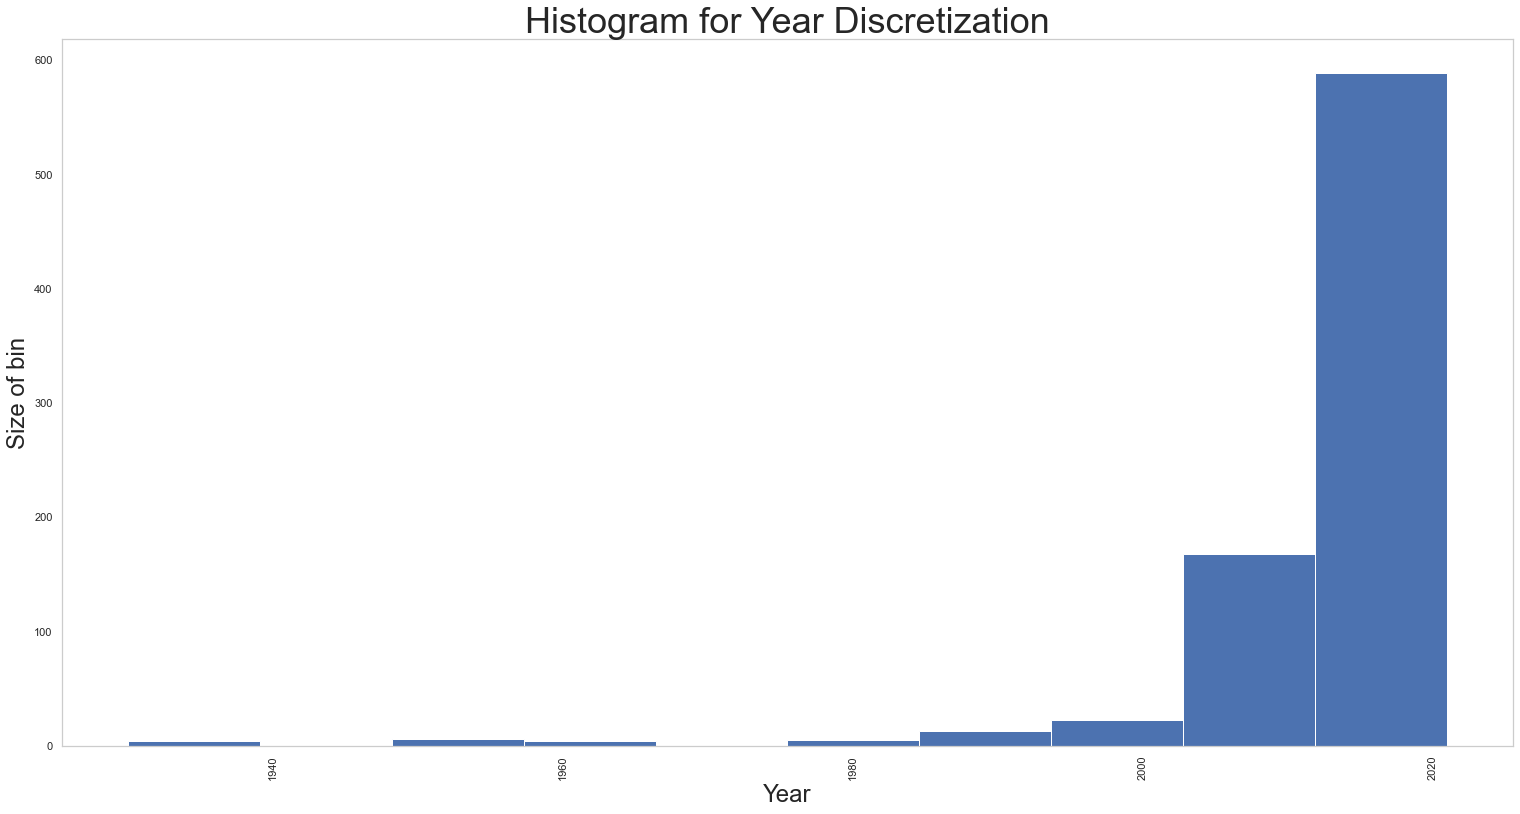

In [32]:
# Plot the histogram for the Year attribute to observe distribution
# We are doing this so that we can decide how to apply the discretization sensibly

# histogram of the raw data
fig_hist1, ax_hist1 = plt.subplots(figsize=(26,13))
# Set gridline off
ax_hist1.grid(False)

# Create a handler for X axis
#x = ax.xaxis

# Number of ticks 
#lin_ticks = LinearLocator(51)
#ax.set_xticks(df_dummy.index)

plt.hist(df_dummy['Year'], bins=10)

plt.xlabel("Year", fontsize=24)
plt.ylabel("Size of bin", fontsize=24)
plt.title("Histogram for Year Discretization", fontsize=36)
#x.set_major_locator(lin_ticks)
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=5)          # controls default text sizes

plt.show()

<font color='blue'> <b><u> Create custom categories of data based on the histogram: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> vintage (year<1991) = 0. </li>
<li> old (1991<=year<=2002) = 1. </li>
<li> medium (2003<=year<=2013) = 2. 
<li> recent (2014<=year<=2019) = 3.</li>
<li> new (2020<=year) = 4. </li> </ul>

In [33]:
# Create new dummy variables for Age of vehicle
# This will be based on the manufacturing Year and in-line with the custom categories we defined above
df_dummy['Age'] = df_dummy['Year'].copy()
df_dummy['Age'] = df_dummy['Age'].astype(str)
df_dummy.head(3)

,Year,Model,Variant,Km,Source,Source_Code,-Other-,Audi,BMW,Chevrolet,...,Tata,Toyota,Vintage,Volkswagen,Volvo,Fuel_Alternative,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Age
0,2015,22,LXI A/C,16344,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2015
1,2007,190,LXi,90000,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2007
2,2010,190,Lxi,43500,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2010


In [34]:
pd.options.mode.chained_assignment = None  # default='warn'
df_dummy['Age'].loc[df_dummy['Year'] < 1991] = 'Vintage'
df_dummy['Age'].loc[(df_dummy['Year'] >= 1991) & (df_dummy['Year'] <= 2002)] = 'Old'
df_dummy['Age'].loc[(df_dummy['Year'] >= 2003) & (df_dummy['Year'] <= 2013)] = 'Medium'
df_dummy['Age'].loc[(df_dummy['Year'] >= 2014) & (df_dummy['Year'] <= 2019)] = 'Recent'
df_dummy['Age'].loc[df_dummy['Year'] >= 2020] = 'New'
df_dummy.head(2)

,Year,Model,Variant,Km,Source,Source_Code,-Other-,Audi,BMW,Chevrolet,...,Tata,Toyota,Vintage,Volkswagen,Volvo,Fuel_Alternative,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Age
0,2015,22,LXI A/C,16344,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Recent
1,2007,190,LXi,90000,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Medium


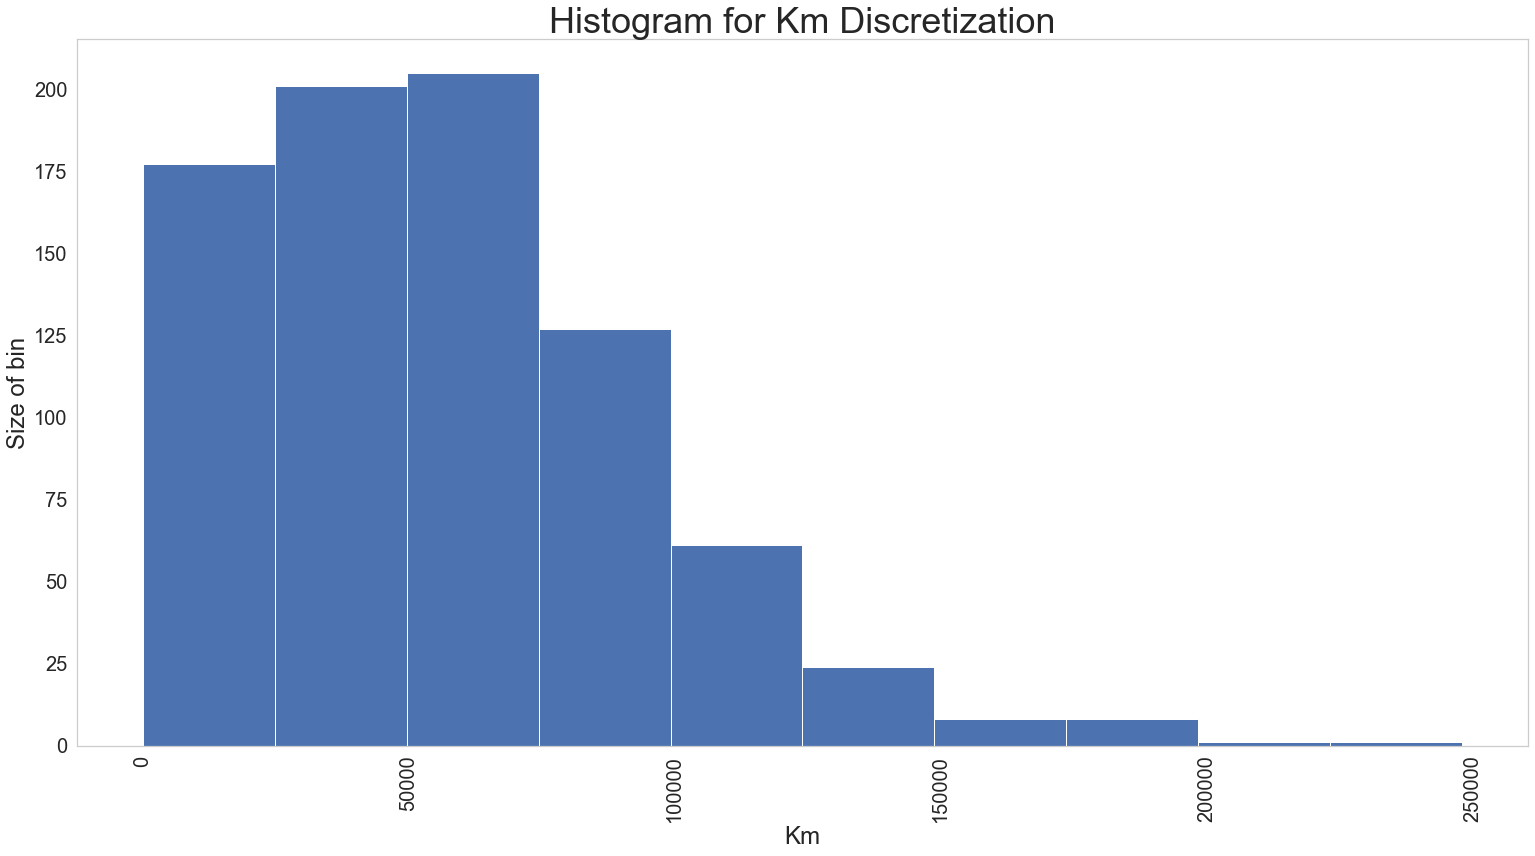

In [35]:
# Plot the histogram for the Km attribute to observe distribution
# We are doing this so that we can decide how to apply the discretization sensibly

# histogram of the raw data
fig_hist2, ax_hist2 = plt.subplots(figsize=(26,13))
# Set gridline off
ax_hist2.grid(False)

# Create a handler for X axis
#x = ax.xaxis

# Number of ticks 
#lin_ticks = LinearLocator(51)
#ax.set_xticks(df_dummy.index)

plt.hist(df_dummy['Km'], bins=10)

plt.xlabel("Km", fontsize=24)
plt.ylabel("Size of bin", fontsize=24)
plt.title("Histogram for Km Discretization", fontsize=36)
#x.set_major_locator(lin_ticks)
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('font', size=5)          # controls default text sizes

plt.show()

<font color='blue'> <b><u> Create custom categories of data (Km) based on the histogram: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> Heavily Driven (Km>99,999) = 0 </li>
<li> Medium Driven (99999<=Km<=50000) = 1 </li>
<li> Less Driven (20000<=year<=49999) = 2 </li>
<li> Lightly Driven (year<=19999) = 3 </li> </ul>

In [36]:
# Create new dummy variables for Usage of the vehicle  indicated by the kilometers driven
# This will be based on the Km and in-line with the custom categories we defined above

df_dummy['Driven'] = df_dummy['Km'].copy()
df_dummy['Driven'] = df_dummy['Driven'].astype(str)
df_dummy.head(3)

,Year,Model,Variant,Km,Source,Source_Code,-Other-,Audi,BMW,Chevrolet,...,Toyota,Vintage,Volkswagen,Volvo,Fuel_Alternative,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Age,Driven
0,2015,22,LXI A/C,16344,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Recent,16344
1,2007,190,LXi,90000,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Medium,90000
2,2010,190,Lxi,43500,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Medium,43500


In [37]:
pd.options.mode.chained_assignment = None  # default='warn'
df_dummy['Driven'].loc[df_dummy['Km'] > 99999] = 'Heavily'
df_dummy['Driven'].loc[(df_dummy['Km'] <= 99999) & (df_dummy['Km'] >= 50000)] = 'Fairly'
df_dummy['Driven'].loc[(df_dummy['Km'] <= 49999) & (df_dummy['Km'] >= 20000)] = 'Medium'
df_dummy['Driven'].loc[df_dummy['Km'] < 20000] = 'Lightly'
df_dummy.head(3)

,Year,Model,Variant,Km,Source,Source_Code,-Other-,Audi,BMW,Chevrolet,...,Toyota,Vintage,Volkswagen,Volvo,Fuel_Alternative,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Age,Driven
0,2015,22,LXI A/C,16344,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Recent,Lightly
1,2007,190,LXi,90000,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Medium,Fairly
2,2010,190,Lxi,43500,Team BHP,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Medium,Medium


In [38]:
df_dummy = pd.get_dummies(df_dummy, columns=['Age', 'Driven'])
df_dummy.head(4)

,Year,Model,Variant,Km,Source,Source_Code,-Other-,Audi,BMW,Chevrolet,...,Fuel_Petrol,Age_Medium,Age_New,Age_Old,Age_Recent,Age_Vintage,Driven_Fairly,Driven_Heavily,Driven_Lightly,Driven_Medium
0,2015,22,LXI A/C,16344,Team BHP,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,2007,190,LXi,90000,Team BHP,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
2,2010,190,Lxi,43500,Team BHP,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3,2014,123,GT TSI,121000,Team BHP,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [39]:
df_fnl = df_dummy.drop(['Source', 'Year', 'Variant', 'Km', 'Model'], axis=1)
df_fnl.head(3)

,Source_Code,-Other-,Audi,BMW,Chevrolet,Datsun,Fiat,Force,Ford,HM,...,Fuel_Petrol,Age_Medium,Age_New,Age_Old,Age_Recent,Age_Vintage,Driven_Fairly,Driven_Heavily,Driven_Lightly,Driven_Medium
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [40]:
##---------Type the code below this line------------------##

# Set parameters to be used in train_test_split
test_case = 0.1
rand_var = 1

# Defining X and Y
X_pre = df_fnl.drop(['Source_Code'], axis=1)
y_pre = df_fnl[['Source_Code']]

# Split the dataset to train and test for Case A
X_train_init_A, X_test_init_A, y_train_init_A, y_test_init_A = train_test_split(X_pre, y_pre, test_size=test_case, random_state=rand_var)

# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

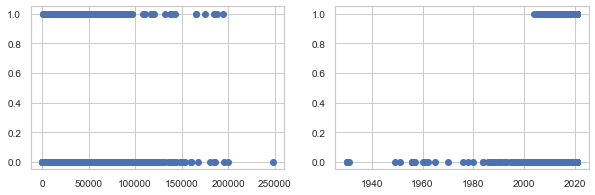

In [55]:
##---------Type the code below this line------------------##
fig_scat, ax_scat = plt.subplots(figsize=(10,3))

plt.subplot(1, 2, 1)
plt.scatter(df_dummy['Km'], df_dummy['Source_Code'])

plt.subplot(1, 2, 2)
plt.scatter(df_dummy['Year'], df_dummy['Source_Code'])

plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('font', size=4)          # controls default text sizes

plt.show()

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> The relevant features have been plotted. It will not help to plot binary features against another binary feature (Source_Code). </li> </ul>

## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.


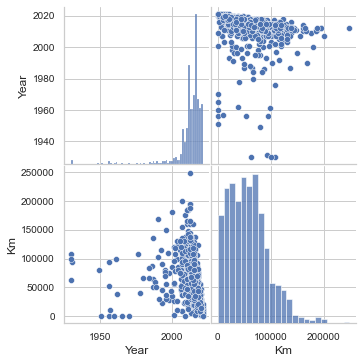

In [56]:
##---------Type the code below this line------------------##

# Create the default pairplot
sns.pairplot(df_pre)

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> Only continuous variables will be plotted here. </li> </ul>

## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable. 


In [ ]:
##---------Type the code below this line------------------##

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> The output variable is binary. There is no point in trying to use a regression plot. </li> </ul>

## 4.4 Can any other plot help to identify the optimal set of attributes that can be used for classification. The plot will be based on linear or nonlinear separations. If there is/are such plots, name them, explain why you think they can be helpful in the task and perform the plot as well.


In [ ]:
##---------Type the code below this line------------------##

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> For this particular problem, there are no such plots that need to be done additionally. 
Whatever we can find, we can do so using the next step of data wrangling. </li> </ul>

# 5. Data Wrangling



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

<AxesSubplot:>

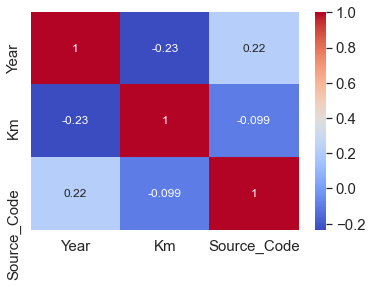

In [57]:
##---------Type the code below this line------------------##

# Visualize heatmap of correlation matrix
plt.figure(figsize=[6,4])
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('font', size=12)          # controls default text sizes
sns.heatmap(df_encd.corr(),cmap='coolwarm',annot=True)

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>three</b>) 

Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

In [58]:
##---------Type the code below this line------------------##

<font color='blue'><center><h2> Information Gain (using Entropy) </h2></center>

In [59]:
def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy

In [60]:
fnl_cols = df_fnl.columns.to_list()
fnl_cols

['Source_Code',
 '-Other-',
 'Audi',
 'BMW',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'HM',
 'Honda',
 'Hyundai',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land',
 'Lexus',
 'MG',
 'MINI',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Premier',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Vintage',
 'Volkswagen',
 'Volvo',
 'Fuel_Alternative',
 'Fuel_CNG',
 'Fuel_Diesel',
 'Fuel_Petrol',
 'Age_Medium',
 'Age_New',
 'Age_Old',
 'Age_Recent',
 'Age_Vintage',
 'Driven_Fairly',
 'Driven_Heavily',
 'Driven_Lightly',
 'Driven_Medium']

In [61]:
df_fnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Source_Code       813 non-null    int32
 1   -Other-           813 non-null    uint8
 2   Audi              813 non-null    uint8
 3   BMW               813 non-null    uint8
 4   Chevrolet         813 non-null    uint8
 5   Datsun            813 non-null    uint8
 6   Fiat              813 non-null    uint8
 7   Force             813 non-null    uint8
 8   Ford              813 non-null    uint8
 9   HM                813 non-null    uint8
 10  Honda             813 non-null    uint8
 11  Hyundai           813 non-null    uint8
 12  Jaguar            813 non-null    uint8
 13  Jeep              813 non-null    uint8
 14  Kia               813 non-null    uint8
 15  Land              813 non-null    uint8
 16  Lexus             813 non-null    uint8
 17  MG                813 non-null    u

In [62]:
i = 0
fnl_col_len = len(fnl_cols)
entropy = []
print("Display Entropy of all columns.")
print("===============================")
while i < fnl_col_len:
    temp_col = df_fnl[fnl_cols[i]].to_numpy()
    val = calc_entropy(temp_col)
    entropy.append(val)
    print("{} = {}".format(fnl_cols[i], entropy[i]))
    i = i + 1

Display Entropy of all columns.
Source_Code = 0.9345614115693538
-Other- = 0.06287459291205647
Audi = 0.23365339064041202
BMW = 0.29855108223427335
Chevrolet = 0.07973121825387969
Datsun = 0.03513719189363407
Fiat = 0.159966635203027
Force = 0.03513719189363407
Ford = 0.29855108223427335
HM = 0.04480320631137239
Honda = 0.4063262491215
Hyundai = 0.4755891434871042
Jaguar = 0.04480320631137239
Jeep = 0.10337795557827954
Kia = 0.06287459291205647
Land = 0.07973121825387969
Lexus = 0.03513719189363407
MG = 0.03513719189363407
MINI = 0.013664106952809885
Mahindra = 0.2615848475550843
Maruti = 0.6898269929618326
Mercedes-Benz = 0.29855108223427335
Mitsubishi = 0.07143119343056903
Nissan = 0.10337795557827954
Porsche = 0.07973121825387969
Premier = 0.04480320631137239
Renault = 0.17302899720245113
Skoda = 0.2777123319995035
Tata = 0.2102444235834185
Toyota = 0.34771419100077205
Vintage = 0.11090987618569115
Volkswagen = 0.33337322125893565
Volvo = 0.07143119343056903
Fuel_Alternative = 0.071

In [63]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = data[split_name].unique()
    
    
    # Make two subsets of the data, based on the unique values
    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

In [64]:
j = 1
fnl_col_len = len(fnl_cols)
info_gain = []
print("Display Information Gain for all columns with respect to the Target column.")
print("===============================")
while j < fnl_col_len:
    val = calc_information_gain(df_fnl, fnl_cols[j], 'Source_Code')
    info_gain.append(val)
    print("{} = {}".format(fnl_cols[j], info_gain[j-1]))
    j = j + 1

Display Information Gain for all columns with respect to the Target column.
-Other- = 0.004617040873364342
Audi = 0.00046896676339347465
BMW = 0.0038228755774281087
Chevrolet = 0.006165618934732109
Datsun = 3.5070301258599557e-06
Fiat = 0.008852033311509189
Force = 0.0023031686113214045
Ford = 0.002623790731871134
HM = 0.0030732650867236755
Honda = 0.002928985708192
Hyundai = 0.005985701523179343
Jaguar = 0.0023671493498993446
Jeep = 0.003612764691102721
Kia = 7.039930425167817e-06
Land = 0.0006711846580509384
Lexus = 3.5070301258599557e-06
MG = 0.005598702101227926
MINI = 0.0018621645905468887
Mahindra = 4.385719829014256e-05
Maruti = 0.015456102339568623
Mercedes-Benz = 0.00042074163522476393
Mitsubishi = 0.005390727723610711
Nissan = 0.0002738664667255586
Porsche = 0.0006711846580509384
Premier = 0.0030732650867236755
Renault = 0.002398316274517809
Skoda = 0.002443573107501429
Tata = 0.00032876097882961197
Toyota = 0.001040328342536978
Vintage = 0.009277303966490291
Volkswagen = 0.0

<function matplotlib.pyplot.show(close=None, block=None)>

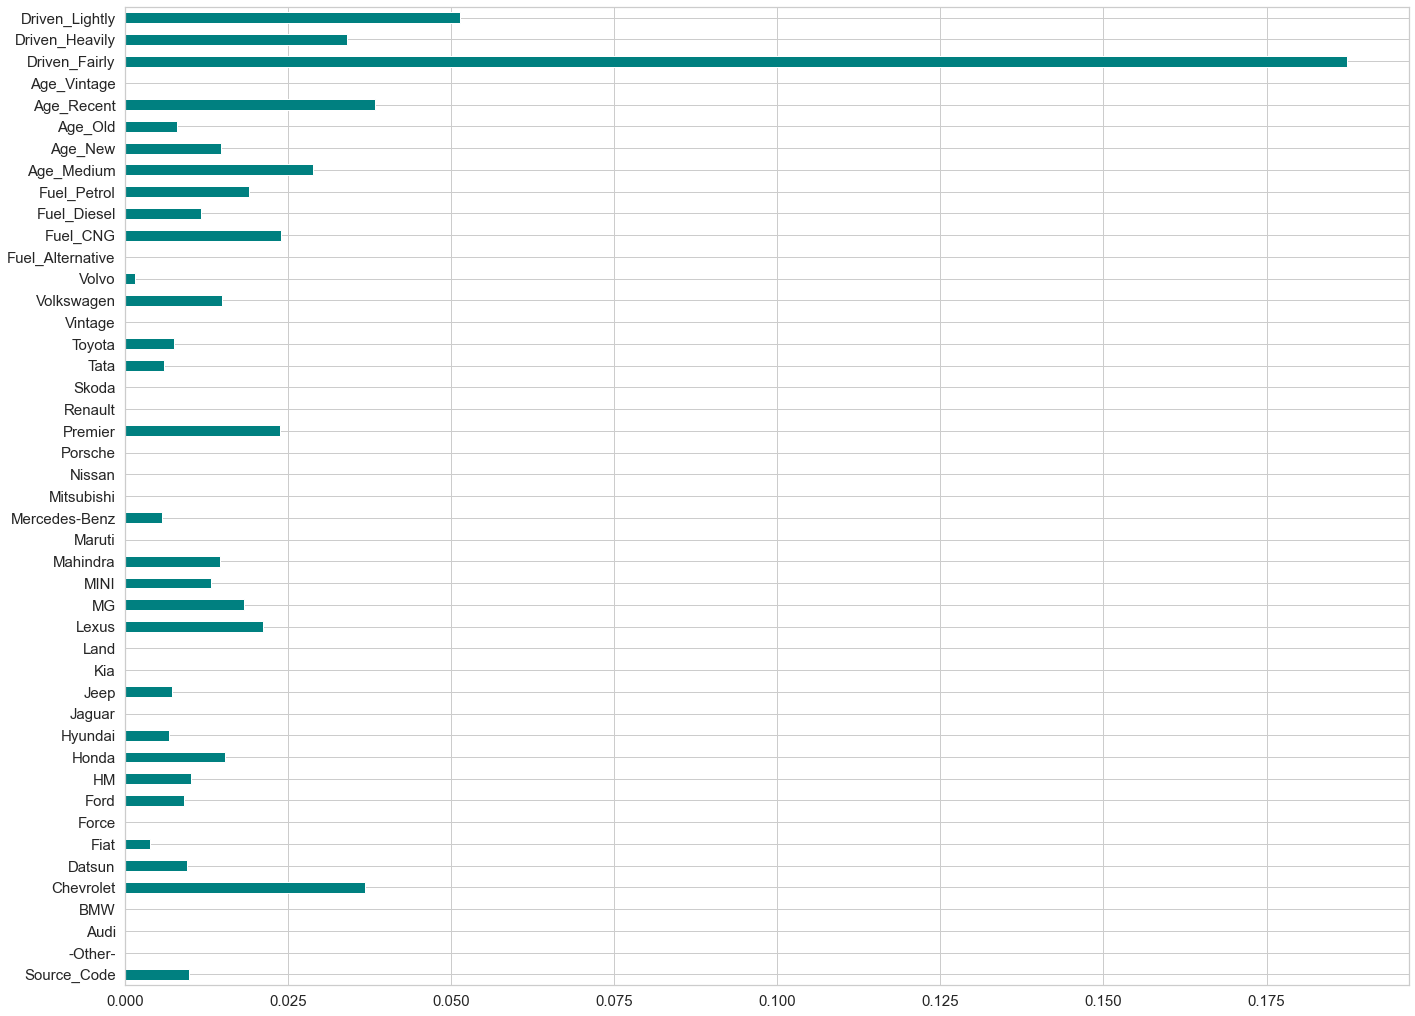

In [66]:
# This is a more simpler and visual way of calculating the info gain

array_mi = df_fnl.values
X_mi = array_mi[:,0:45]
Y_mi = array_mi[:,45]

importance = mutual_info_classif(X_mi,Y_mi)
feat_importance = pd.Series(importance, df_fnl.columns[0: len(df_fnl.columns)-1])
feat_importance.plot(kind='barh', color='teal' , fontsize=15, figsize=(23, 18))
plt.show

<font color='blue'> <b><u> Top 5 features based on Info Gain (larger value indicate better quality split): </b></u> <br>
<ul style="list-style-type:disc"> 
<li> Driven Fairly. </li> 
<li> Driven Lightly. </li>
<li> Age Recent. </li>
<li> Chevrolet. </li>
<li> Driven Heavily. </li></ul>

<font color='blue'><center><h2> Chi-Squared Test </h2></center>

In [67]:
# Calculating chi-squared values using contingency tables
i = 1
chi_sq_vals = []
print("Display p-values from Chi-squared test of all columns.")
print("===============================")
while i < fnl_col_len:
    contigency = pd.crosstab(index=df_fnl[fnl_cols[i]], columns=df_fnl['Source_Code'], margins=True)
    c, p, dof, expected = chi2_contingency(contigency)
    chi_sq_vals.append(p)
    print("{} = {}".format(fnl_cols[i], chi_sq_vals[i-1]))
    i = i + 1

Display p-values from Chi-squared test of all columns.
-Other- = 0.5148612845242273
Audi = 0.9721680656560895
BMW = 0.408879264891732
Chevrolet = 0.3593371141965928
Datsun = 0.9999980797824403
Fiat = 0.1080374724781644
Force = 0.8042350943368063
Ford = 0.595892890715453
HM = 0.7045680699911858
Honda = 0.4913764136739899
Hyundai = 0.13548800673354414
Jaguar = 0.5888630237288843
Jeep = 0.5086249852099379
Kia = 0.999992272098948
Land = 0.9394363158196847
Lexus = 0.9999980797824403
MG = 0.23291671014018064
MINI = 0.7624218429816472
Mahindra = 0.9997039852206795
Maruti = 0.001209691442644624
Mercedes-Benz = 0.9769243857094548
Mitsubishi = 0.4321562874267242
Nissan = 0.9900285755275441
Porsche = 0.9394363158196847
Premier = 0.7045680699911858
Renault = 0.5845603302705491
Skoda = 0.6300573748068758
Tata = 0.9855347076754475
Toyota = 0.8885486355845313
Vintage = 0.16016802525543686
Volkswagen = 0.9944518144958927
Volvo = 0.8243298373945764
Fuel_Alternative = 0.4321562874267242
Fuel_CNG = 0.114

<font color='blue'> <b><u> Top 5 features based on Chi-squared: (Smaller p-value indicate better quality split): </b></u> <br>
<ul style="list-style-type:disc"> 
<li> Age_Recent. </li> 
<li> Driven_Heavily. </li>
<li> Maruti. </li>
<li> Age_Old. </li>
<li> Age_Vintage. </li> </ul>

<font color='blue'><center><h2> Fisher's Score </h2></center>

<function matplotlib.pyplot.show(close=None, block=None)>

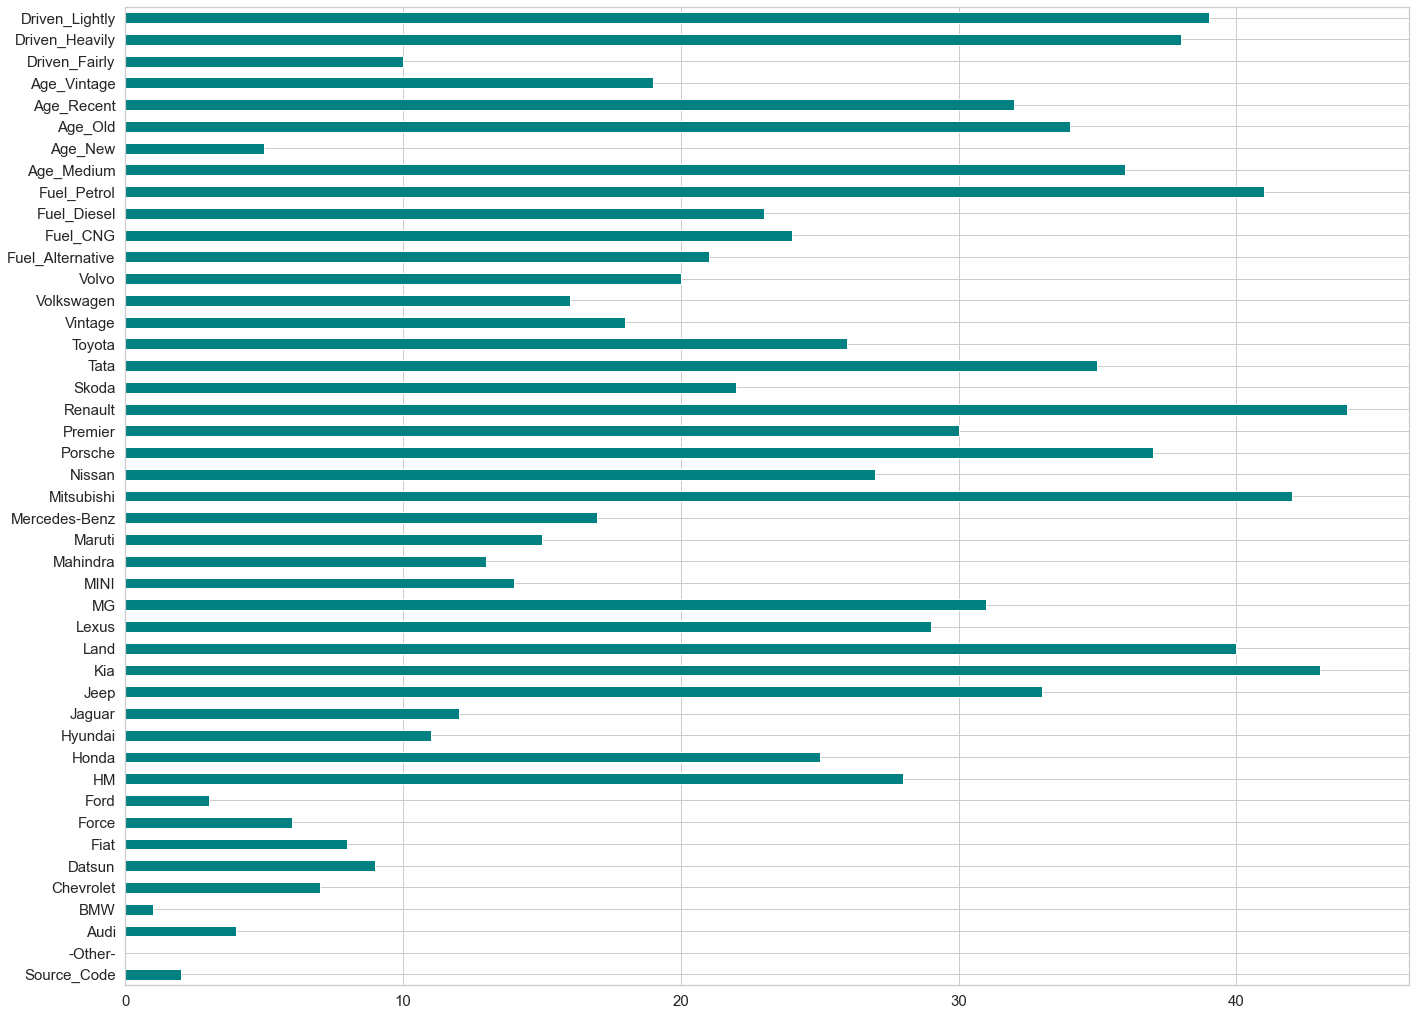

In [69]:
array = df_fnl.values
X = array[:,0:45]
Y = array[:,45]

# Calculating scores
ranks = fisher_score.fisher_score(X, Y)

# Plotting the ranks
feat_importances = pd.Series(ranks, df_fnl.columns[0:len(df_fnl.columns)-1])
feat_importances.plot(kind='barh', color='teal', fontsize=15, figsize=(23, 18))
plt.show

<font color='blue'> <b><u> Top 5 features based on Fisher Score (higher score indicate better quality split): </b></u> <br>
<ul style="list-style-type:disc"> 
<li> Renault. </li> 
<li> Kia. </li>
<li> Mitsubishi. </li>
<li> Fuel Petrol. </li>
<li> Land. </li></ul>

## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

In [70]:
##---------Type the code below this line------------------##

# Defining the decision tree algorithm
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(X_train_init_A, y_train_init_A)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [71]:
# Predicting the values of test data
y_pred = dtree.predict(X_test_init_A)
print("Classification report - \n", classification_report(y_test_init_A, y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.57      0.93      0.71        45
           1       0.62      0.14      0.22        37

    accuracy                           0.57        82
   macro avg       0.60      0.53      0.46        82
weighted avg       0.59      0.57      0.49        82



Text(0.5, 1.0, 'Accuracy Score: 0.573')

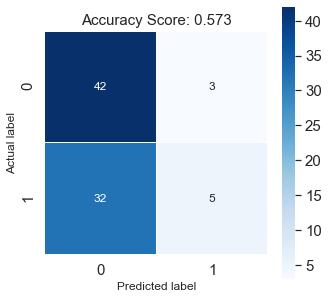

In [72]:
cm = confusion_matrix(y_test_init_A, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(dtree.score(X_test_init_A, y_test_init_A),3))
plt.title(all_sample_title, size = 15)

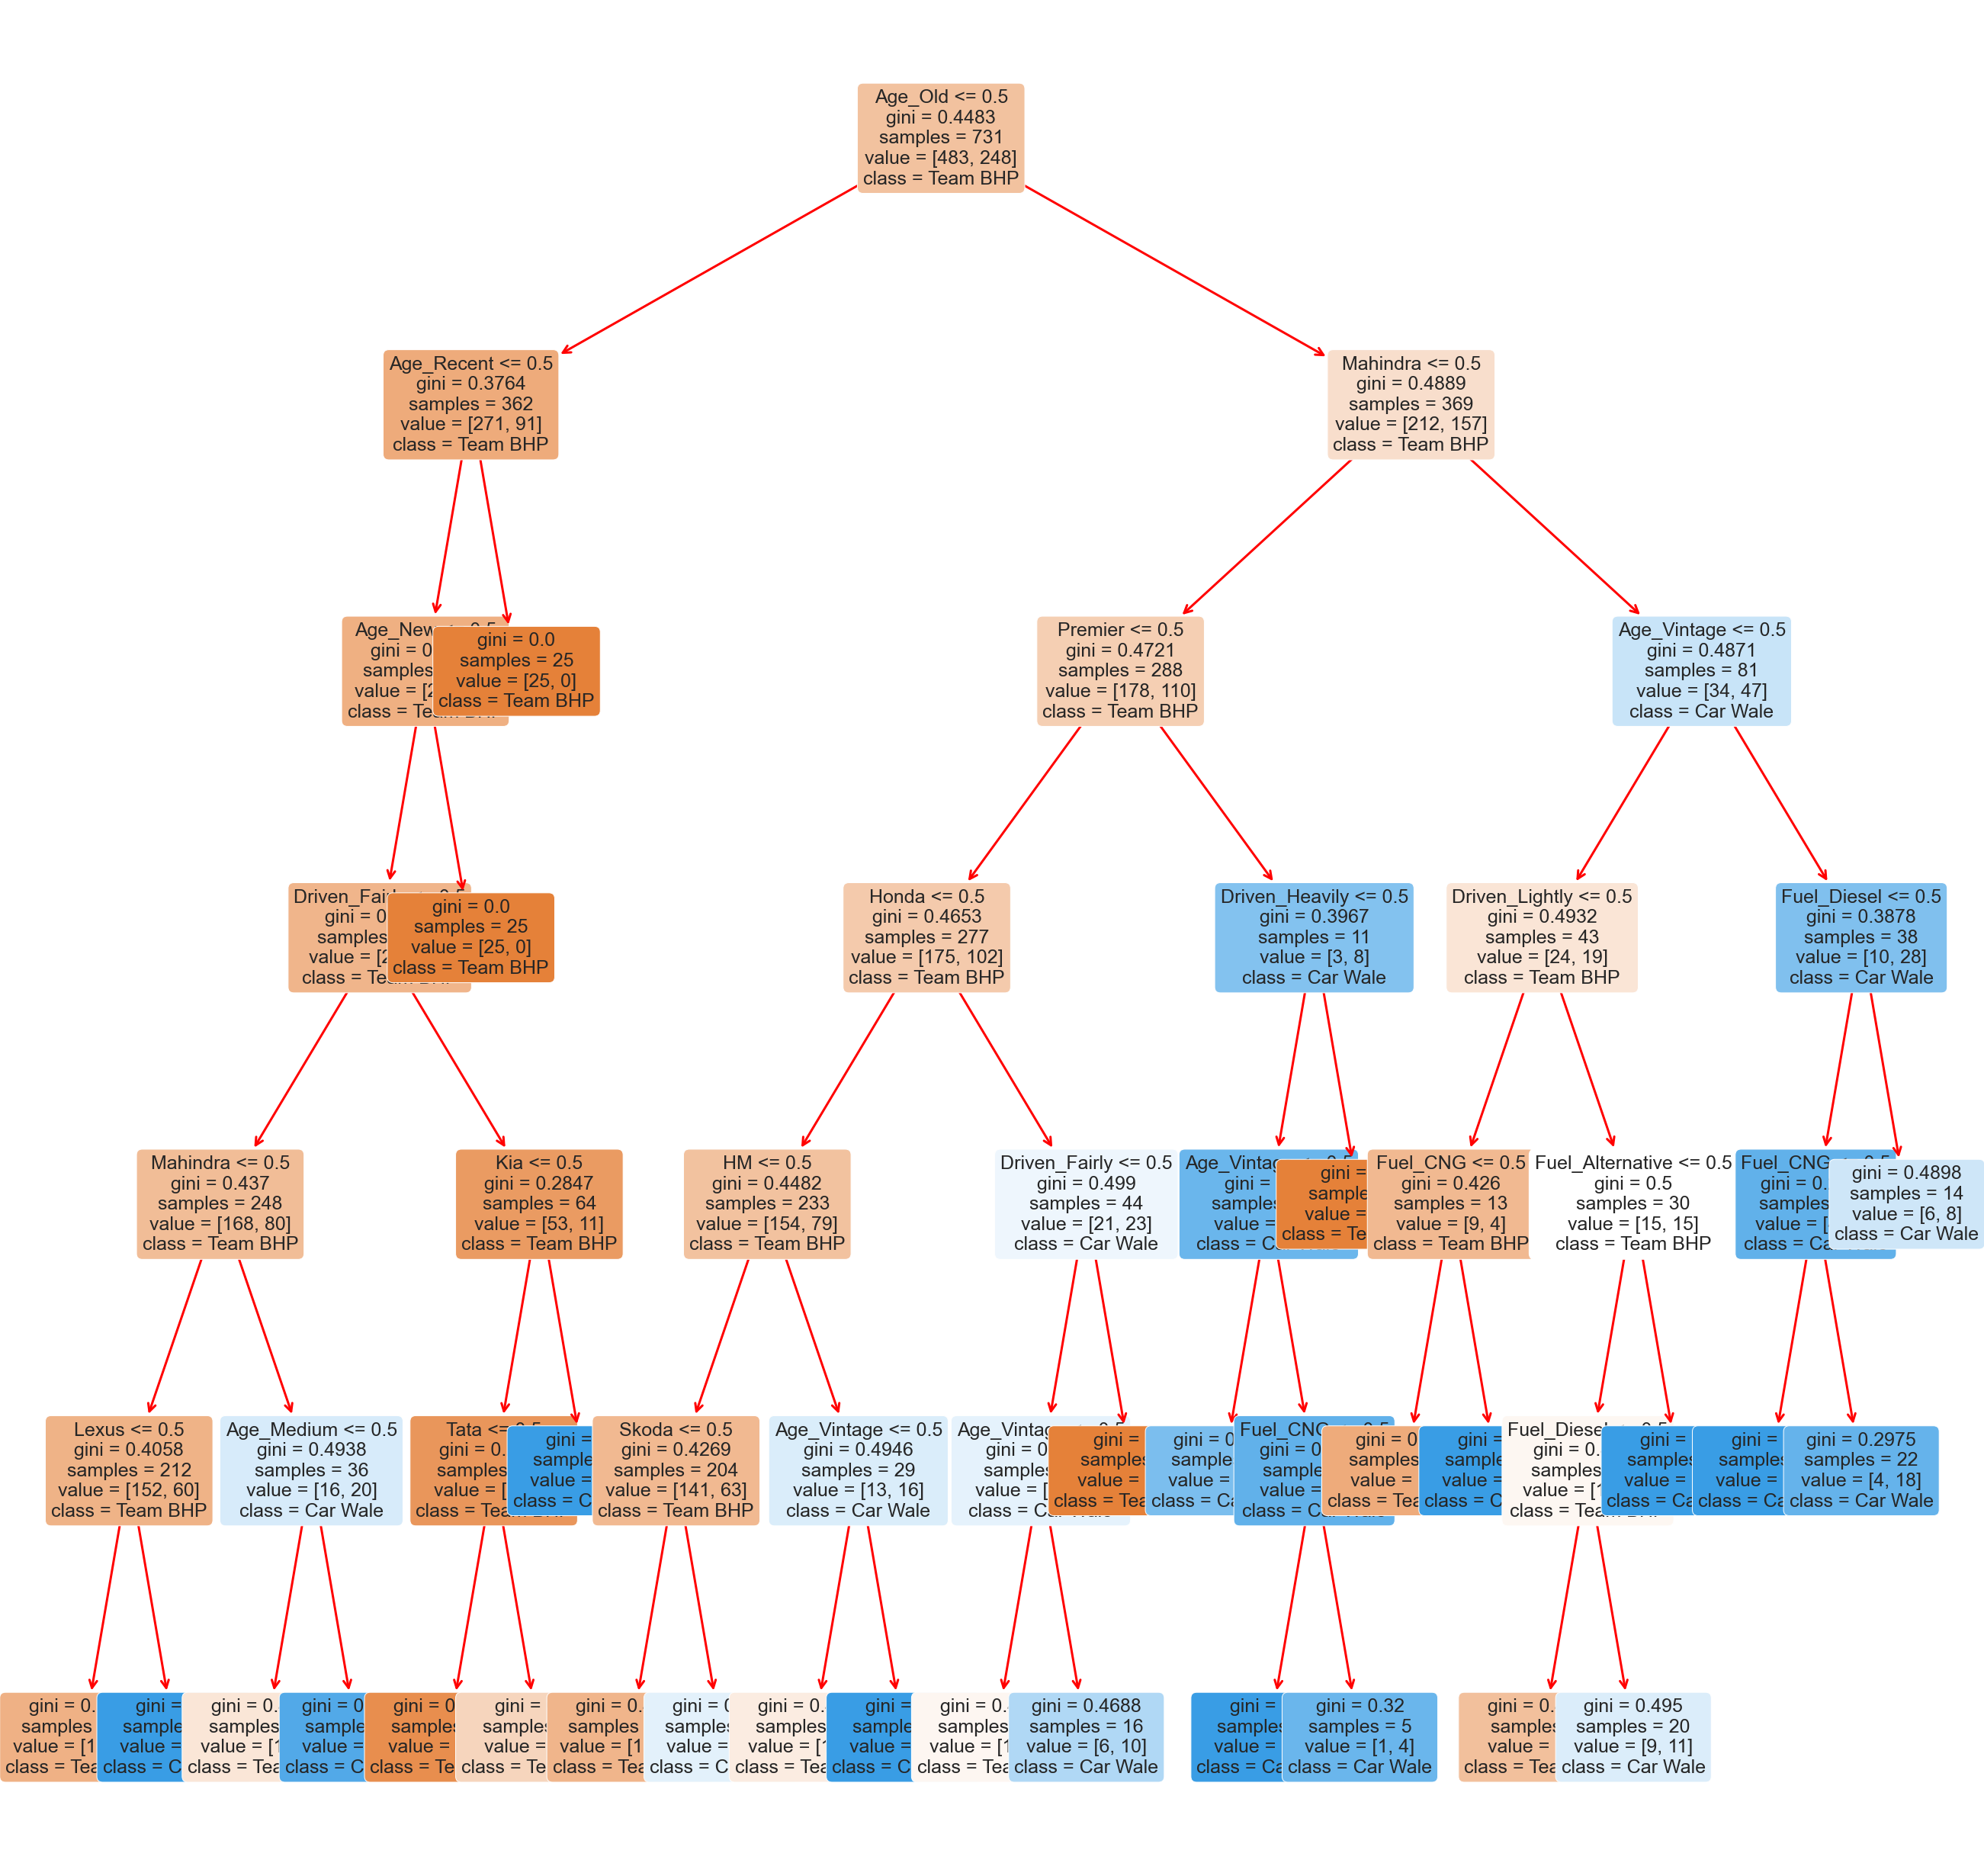

In [73]:
# Visualising the graph without the use of graphviz
#plt.figure(figsize = (25,25))
fig_tree, ax_tree = plt.subplots(figsize=(45,45))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df_fnl.columns, class_names =["Team BHP", "Car Wale"], 
            fontsize=25, filled = True , precision = 4, rounded = True)
#out = tree.plot_tree(clf)
for o in dec_tree:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

<font color='blue'> <b><u> Top 5 features based on Gini index (used to construct the decision tree): </b></u> <br>
<ul style="list-style-type:disc"> 
<li> Age_Old. </li> 
<li> Mahindra. </li>
<li> Age_New. </li>
<li> Age_Recent. </li>
<li> Age_Vintage. </li></ul>

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [74]:
##---------Type the code below this line------------------##

sfs = SFS(dtree, forward=False, cv=10, k_features = (3,10), scoring='accuracy', verbose=False, n_jobs=-1)
sfs.fit(X_train_init_A, y_train_init_A, custom_feature_names=X_train_init_A.columns.tolist())

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(max_depth=6),
                          forward=False, k_features=(3, 10), n_jobs=-1,
                          scoring='accuracy', verbose=False)

In [75]:
print(f"Best score achieved: {sfs.k_score_}, Feature's names: {sfs.k_feature_names_}")

Best score achieved: 0.7018141429100333, Feature's names: ('Ford', 'Honda', 'MG', 'Maruti', 'Renault', 'Age_New', 'Age_Recent', 'Age_Vintage', 'Driven_Fairly', 'Driven_Heavily')


In [76]:
display(pd.DataFrame(sfs.get_metric_dict()))

,45,44,43,42,41,40,39,38,37,36,...,12,11,10,9,8,7,6,5,4,3
feature_idx,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...",...,"(7, 9, 16, 19, 25, 33, 37, 39, 40, 41, 42, 43)","(7, 9, 16, 19, 25, 33, 37, 39, 40, 41, 42)","(7, 9, 16, 19, 25, 37, 39, 40, 41, 42)","(7, 9, 16, 19, 25, 37, 39, 40, 42)","(9, 16, 19, 25, 37, 39, 40, 42)","(9, 16, 19, 25, 37, 39, 42)","(9, 19, 25, 37, 39, 42)","(9, 19, 37, 39, 42)","(19, 37, 39, 42)","(19, 37, 39)"
cv_scores,"[0.6351351351351351, 0.726027397260274, 0.7397...","[0.6351351351351351, 0.7397260273972602, 0.794...","[0.6216216216216216, 0.7397260273972602, 0.794...","[0.6351351351351351, 0.7397260273972602, 0.794...","[0.6351351351351351, 0.7397260273972602, 0.794...","[0.6351351351351351, 0.7397260273972602, 0.794...","[0.6351351351351351, 0.7397260273972602, 0.794...","[0.6486486486486487, 0.7397260273972602, 0.794...","[0.6486486486486487, 0.7397260273972602, 0.794...","[0.6486486486486487, 0.7397260273972602, 0.794...",...,"[0.6891891891891891, 0.726027397260274, 0.7397...","[0.6891891891891891, 0.726027397260274, 0.7397...","[0.6756756756756757, 0.726027397260274, 0.7397...","[0.6891891891891891, 0.6712328767123288, 0.767...","[0.6891891891891891, 0.6712328767123288, 0.767...","[0.6891891891891891, 0.6712328767123288, 0.767...","[0.6891891891891891, 0.6712328767123288, 0.753...","[0.6756756756756757, 0.6712328767123288, 0.767...","[0.6891891891891891, 0.6712328767123288, 0.739...","[0.6891891891891891, 0.6712328767123288, 0.739..."
avg_score,0.678582,0.686801,0.690929,0.69639,0.69913,0.7005,0.70187,0.703221,0.704591,0.704591,...,0.703165,0.704535,0.701814,0.701796,0.701796,0.699056,0.697686,0.693595,0.688097,0.688097
feature_names,"(-Other-, Audi, BMW, Chevrolet, Datsun, Fiat, ...","(-Other-, Audi, BMW, Chevrolet, Datsun, Fiat, ...","(-Other-, Audi, Chevrolet, Datsun, Fiat, Force...","(-Other-, Audi, Chevrolet, Datsun, Fiat, Force...","(-Other-, Audi, Chevrolet, Datsun, Fiat, Force...","(-Other-, Audi, Chevrolet, Datsun, Fiat, Force...","(-Other-, Audi, Chevrolet, Datsun, Fiat, Force...","(-Other-, Audi, Chevrolet, Datsun, Fiat, Force...","(-Other-, Audi, Chevrolet, Datsun, Fiat, Force...","(-Other-, Audi, Chevrolet, Datsun, Fiat, Force...",...,"(Ford, Honda, MG, Maruti, Renault, Fuel_CNG, A...","(Ford, Honda, MG, Maruti, Renault, Fuel_CNG, A...","(Ford, Honda, MG, Maruti, Renault, Age_New, Ag...","(Ford, Honda, MG, Maruti, Renault, Age_New, Ag...","(Honda, MG, Maruti, Renault, Age_New, Age_Rece...","(Honda, MG, Maruti, Renault, Age_New, Age_Rece...","(Honda, Maruti, Renault, Age_New, Age_Recent, ...","(Honda, Maruti, Age_New, Age_Recent, Driven_He...","(Maruti, Age_New, Age_Recent, Driven_Heavily)","(Maruti, Age_New, Age_Recent)"
ci_bound,0.0284268,0.040445,0.0370264,0.0340822,0.0322492,0.0310767,0.0311809,0.0296955,0.029031,0.029031,...,0.0162082,0.0142499,0.0151822,0.0247006,0.0247006,0.025631,0.023736,0.0235234,0.0252439,0.0252439
std_dev,0.0382743,0.0544558,0.0498529,0.0458888,0.0434208,0.0418421,0.0419825,0.0399825,0.0390877,0.0390877,...,0.0218229,0.0191862,0.0204416,0.0332572,0.0332572,0.03451,0.0319585,0.0316722,0.0339888,0.0339888
std_err,0.0127581,0.0181519,0.0166176,0.0152963,0.0144736,0.0139474,0.0139942,0.0133275,0.0130292,0.0130292,...,0.00727431,0.00639541,0.00681386,0.0110857,0.0110857,0.0115033,0.0106528,0.0105574,0.0113296,0.0113296


<font color='blue'> <b><u> Top 5 features based on Gini index (used to construct the decision tree): </b></u> <br>
<ul style="list-style-type:disc"> 
<li> Honda. </li> 
<li> Maruti. </li>
<li> Age_New. </li>
<li> Age_Recent. </li>
<li> Driven_Heavily. </li></ul>

## 5.5 Conclude the top 3 significant features with necessary justifications.

--------------Type the answers below this line--------------

<font color='blue'> <b><u> Comments: </b></u> <br>
<ul style="list-style-type:disc"> 
<li> Age_Recent, Driven_Heavily and Maruti are the 3 key features that seem most significant. </li>
<li> These features were chosen because they showed up in the top-five of most of the measures. </li> 
<li> Especially using mlxtend the accuracy score reached ~69% with just 5 features that included these. </li> </ul>